# Predicting Home Prices in Ames 🏡

The objective of this exercise is to develop a model to predict the price of houses in Ames, Iowa for the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on Kaggle.

### **Table of contents:**  

1. **Exploratory data analysis**
2. **Data cleaning**
3. **Naive model**
4. Feature engineering
5. Feature selection and modelling
6. Productionalize
7. Predictions and conclusion

This notebook contains the sections in bold. 

In [1]:
# imports and display options
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

### 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.shape

(2051, 81)

In [4]:
# check out the predictive variables
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           nan     13517   Pave   NaN   
1  544  531379050           60        RL        43.000     11492   Pave   NaN   
2  153  535304180           20        RL        68.000      7922   Pave   NaN   
3  318  916386060           60        RL        73.000      9802   Pave   NaN   
4  255  906425045           50        RL        82.000     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace       289.000         Gd         TA     CBlock        TA   
1      BrkFace       132.000         Gd         TA      PConc        Gd   
2         None         0.000         TA         Gd     CBlock        TA   
3         None         0.000         TA         TA      PConc        Gd   
4         None         0.000         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ       533.000            Unf   
1        TA            No            GLQ       637.000            Unf   
2        TA            No            GLQ       731.000            Unf   
3        TA            No            Unf         0.000            Unf   
4        Gd            No            Unf         0.000            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0         0.000      192.000        725.000    GasA         Ex           Y   
1         0.000      276.000        913.000    GasA         Ex           Y   
2         0.000      326.000       1057.000    GasA         TA           Y   
3         0.000      384.000        384.000    GasA         Gd           Y   
4         0.000      676.000        676.000    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0           0.000           0.000          2          1              3   
1           1.000           0.000          2          1              4   
2           1.000           0.000          1          0              3   
3           0.000           0.000          2  

ID and PID are used to identify houses in listings, and will not be useful in predicting the actual home prices, so we can drop these columns.

In [6]:
id_cols = ['Id', 'PID']

In [7]:
# lets check out our target variable
df[['SalePrice']].describe()

SalePrice
count   2051.000
mean  181469.702
std    79258.659
min    12789.000
25%   129825.000
50%   162500.000
75%   214000.000
max   611657.000

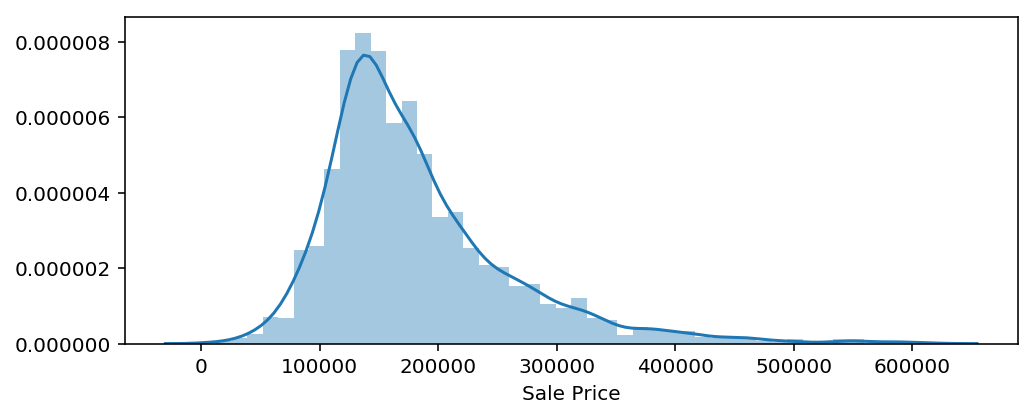

In [8]:
plt.figure(figsize=(8, 3))
sns.distplot(df[['SalePrice']]);
plt.xlabel('Sale Price');

Sale price is right skewed.

In [9]:
# find null values
nulls = pd.DataFrame(df.isnull().sum()).rename(columns={0:'nulls_count'})
nulls['nulls_percent'] = nulls['nulls_count'] / df.shape[0] * 100
nulls[nulls.nulls_count > 0].sort_values(by='nulls_count', ascending=False)

nulls_count  nulls_percent
Pool QC                2042         99.561
Misc Feature           1986         96.831
Alley                  1911         93.174
Fence                  1651         80.497
Fireplace Qu           1000         48.757
Lot Frontage            330         16.090
Garage Yr Blt           114          5.558
Garage Cond             114          5.558
Garage Qual             114          5.558
Garage Finish           114          5.558
Garage Type             113          5.510
Bsmt Exposure            58          2.828
BsmtFin Type 2           56          2.730
Bsmt Cond                55          2.682
Bsmt Qual                55          2.682
BsmtFin Type 1           55          2.682
Mas Vnr Area             22          1.073
Mas Vnr Type             22          1.073
Bsmt Half Bath            2          0.098
Bsmt Full Bath            2          0.098
Total Bsmt SF             1          0.049
Bsmt Unf SF               1          0.049
BsmtFin SF 2              1          0.049
Garage Cars               1          0.049
Garage Area               1          0.049
BsmtFin SF 1              1          0.049

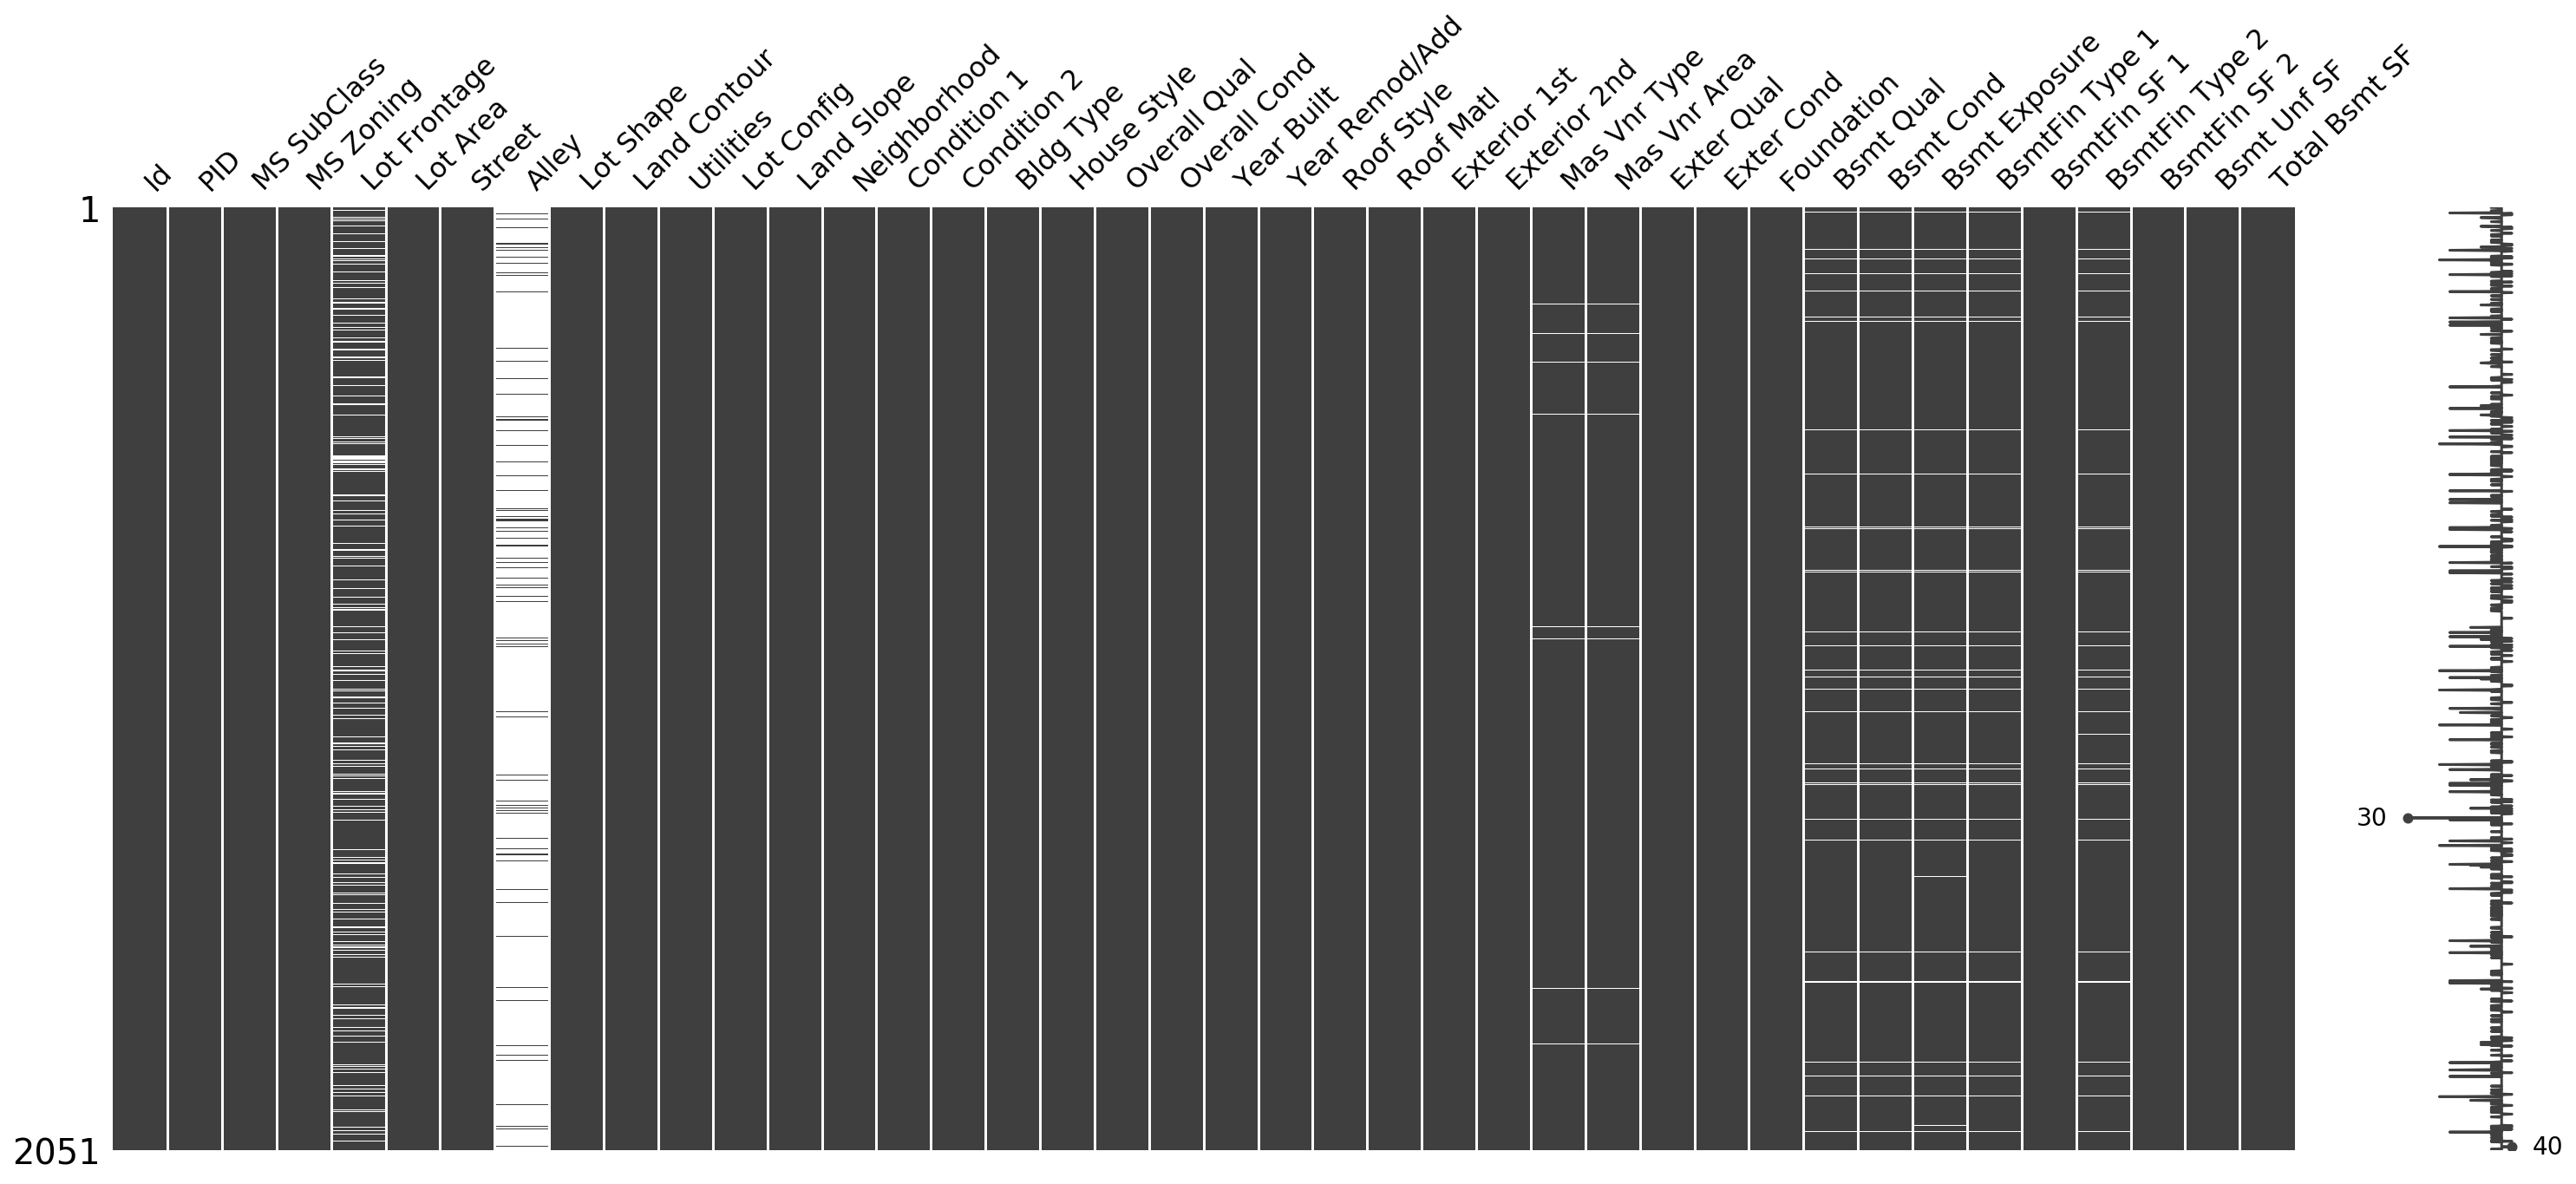

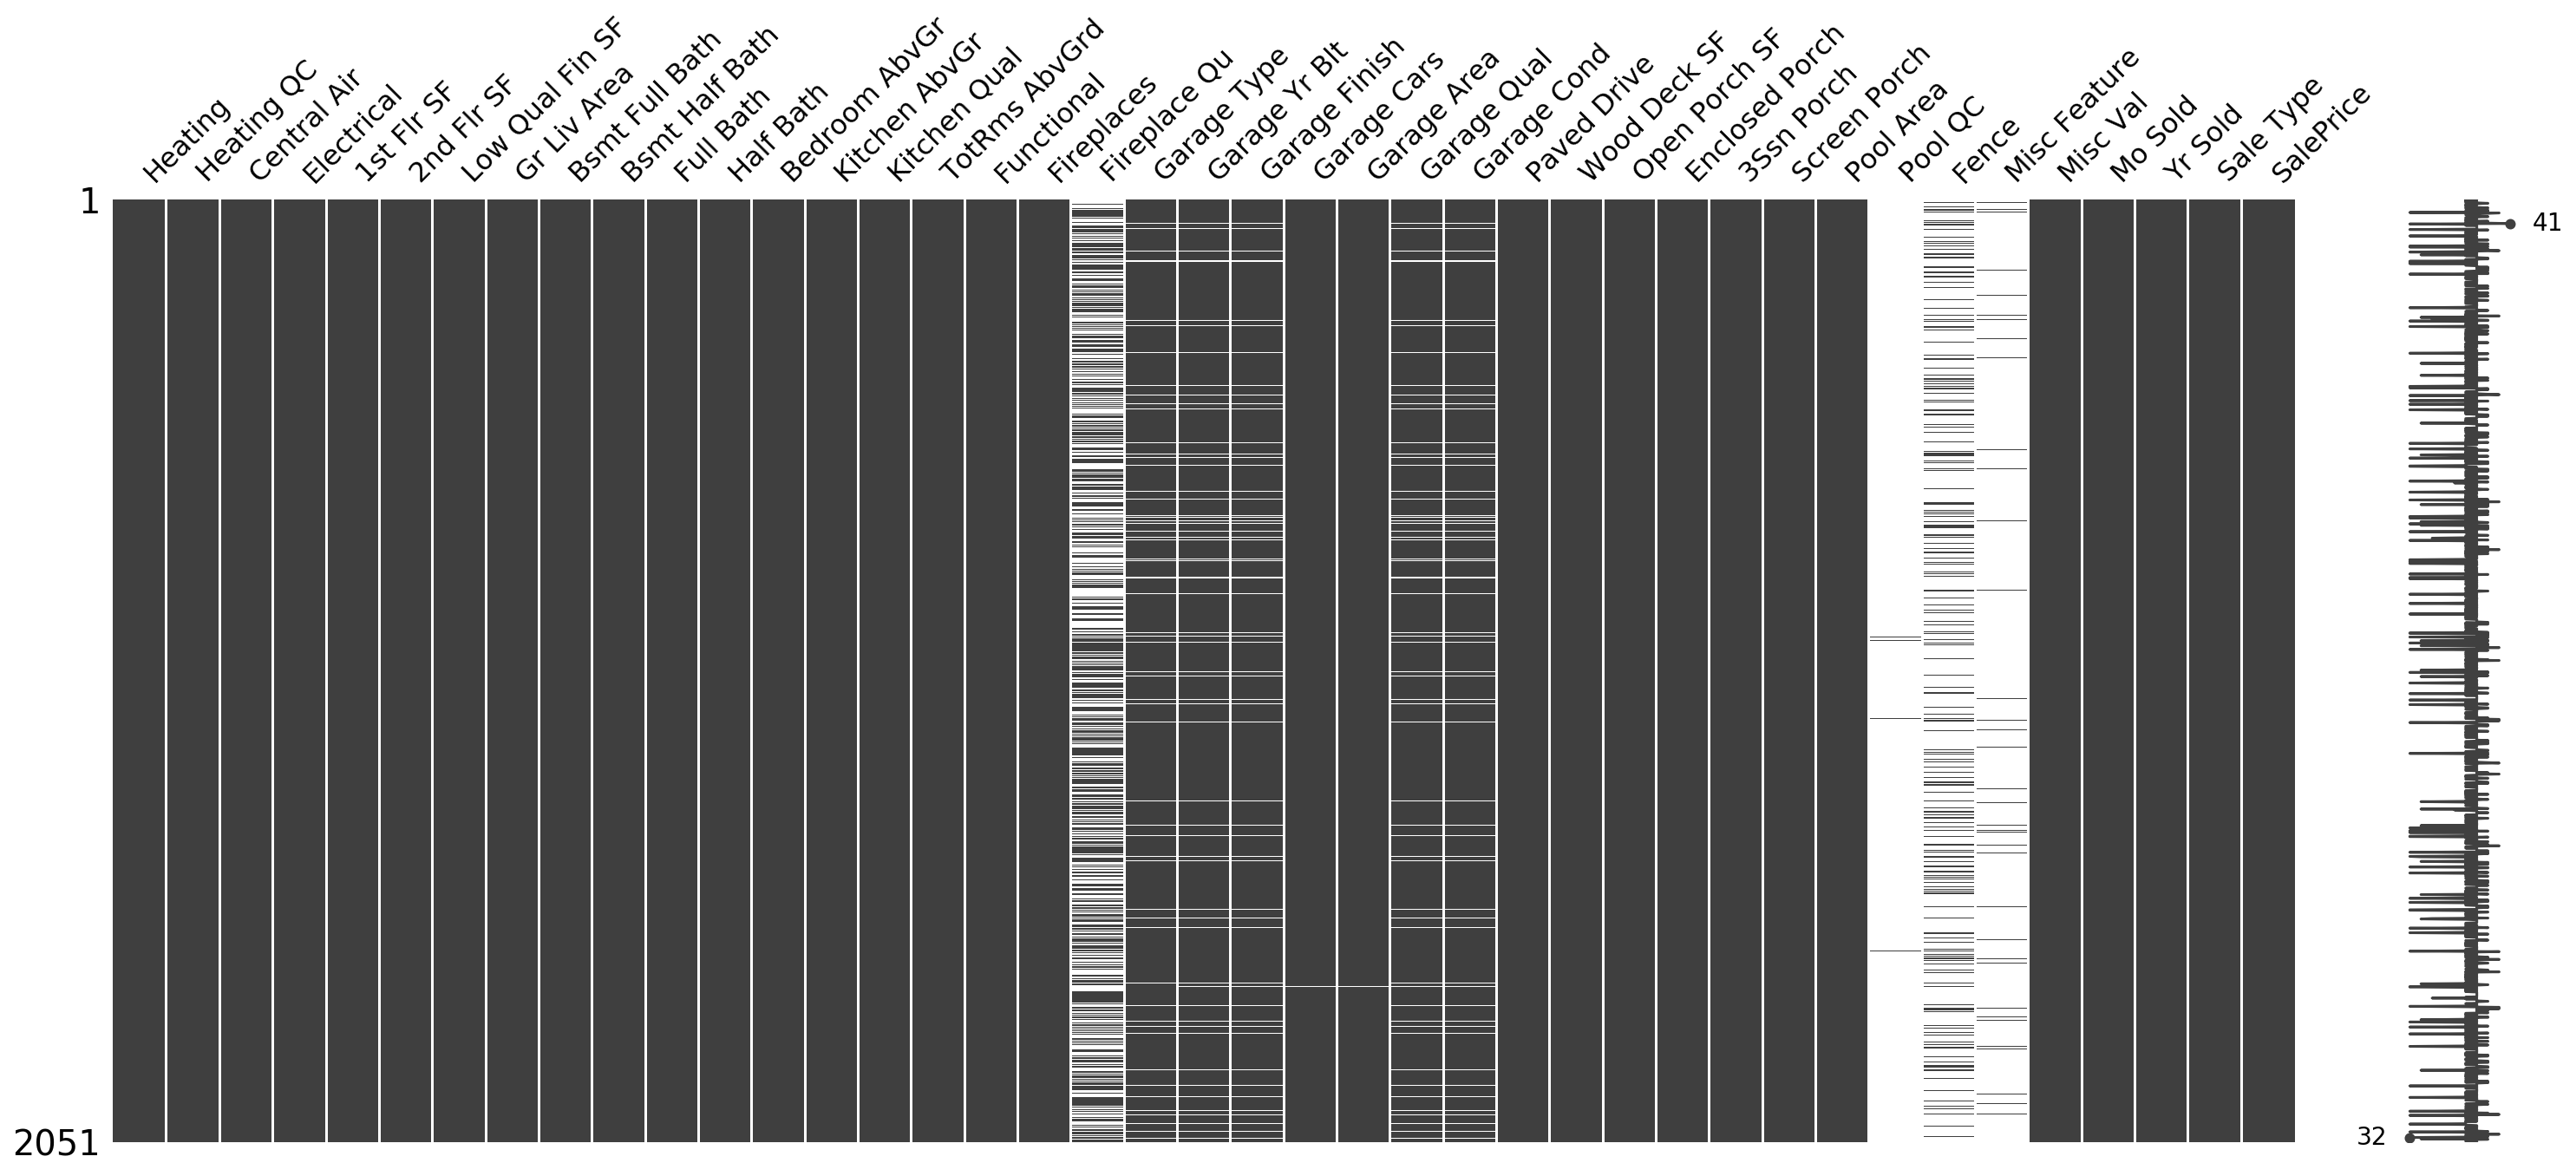

In [10]:
# another way to see nulls
import missingno as msno 
%matplotlib inline
msno.matrix(df.iloc[:, :40]);
msno.matrix(df.iloc[:, 40:]);

As seen here, columns Alley, Pool QC, Fense and Misc Feature have way too many nulls, and so won't be helpful in the prediction of sale prices. We can drop these columns.

For the rest, let's check if these columns are null because the attribute they are describing does not exist in the the house, or if they are null because of actually missing information.

In [11]:
# columns to be dropped
too_many_nulls = ['Pool QC', 'Misc Feature', 'Alley', 'Fence']

# Fireplace category: Fireplace Qu
# Garage category: Garage Cond, Garage Qual, Garage Finish, Garage Type, Garage Yr Built,
#                   Garage Cars, Garage Area
# Lot category: Lot Frontage
# Basement category: Bsmt Exposure, Bsmt Cond, BsmtFin Type 1, BsmtFin Type 2, Bsmt Qual,
#                    Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2,
#                    BsmtFin SF 1                    
# Masonry Veneer category: Mas Vnr Type, Mas Vnr Area

# Fireplace category
# check the value in the Fireplace column for all the rows for which Fireplace Qu is null
df[df['Fireplace Qu'].isna()].groupby('Fireplaces')['Fireplaces'].value_counts()

Fireplaces  Fireplaces
0           0             1000
Name: Fireplaces, dtype: int64

Fireplace Qu had 1000 nulls. All the nulls in Fireplace Qu are indeed for houses that don't have a fireplace since Fireplace = 0. I'll impute null values in the Fireplace Qu column by setting them to None. 

In [12]:
# Garage category
# Garage Area and Garage Cars columns only have 1 nulls each, so we can compare the values
# in these columns with the ones in Garage Type, Garage Yr Blt, Garage Finish, Garage Qual and
# Garage Cond

# Garage Area/Garage Car values of 0 would mean the house does not have a garage

print(f'Nulls in Garage Cond: {df["Garage Cond"].isna().sum()}')
print(df[df['Garage Cond'].isna()].groupby('Garage Area')['Garage Area'].value_counts())
print('\n')
print(f'Nulls in Garage Qual: {df["Garage Qual"].isna().sum()}')
print(df[df['Garage Qual'].isna()].groupby('Garage Area')['Garage Area'].value_counts())
print('\n')
print(f'Nulls in Garage Yr Blt: {df["Garage Yr Blt"].isna().sum()}')
print(df[df['Garage Yr Blt'].isna()].groupby('Garage Area')['Garage Area'].value_counts())
print('\n')
print(f'Nulls in Garage Finish: {df["Garage Finish"].isna().sum()}')
print(df[df['Garage Finish'].isna()].groupby('Garage Area')['Garage Area'].value_counts())
print('\n')
print(f'Nulls in Garage Type: {df["Garage Type"].isna().sum()}')
print(df[df['Garage Type'].isna()].groupby('Garage Area')['Garage Area'].value_counts())

Nulls in Garage Cond: 114
Garage Area  Garage Area
0.000        0.000          113
Name: Garage Area, dtype: int64


Nulls in Garage Qual: 114
Garage Area  Garage Area
0.000        0.000          113
Name: Garage Area, dtype: int64


Nulls in Garage Yr Blt: 114
Garage Area  Garage Area
0.000        0.000          113
Name: Garage Area, dtype: int64


Nulls in Garage Finish: 114
Garage Area  Garage Area
0.000        0.000          113
Name: Garage Area, dtype: int64


Nulls in Garage Type: 113
Garage Area  Garage Area
0.000        0.000          113
Name: Garage Area, dtype: int64


It seems like there are 113 houses that don't have garages. The nulls in the Garage Cond, Garage Qual, Garage Yr Blt and Garage Finish columns are off by value, while the nulls in Garage Type match this number. Let's dig into the 1 or more (?) rows that doesn't have a Garage Area of 0, but has nulls for these columns.

In [13]:
garage_cols = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 
                  'Garage Cond', 'Garage Area', 'Garage Cars']
df[(df['Garage Cond'].isna()) & (df['Garage Area'] != 0)][garage_cols]

Garage Type  Garage Yr Blt Garage Finish Garage Qual Garage Cond  \
1712      Detchd            nan           NaN         NaN         NaN   

      Garage Area  Garage Cars  
1712          nan          nan

We only have one house that actually has a garage but is missing information on the other columns. I'll set the null columns in the 113 rows without garages to None, and the null columns at index 1712 to the most common/mean value in the respective columns. 

In [14]:
# Lot category
# check Lot Config for the rows in which Lot Frontage is null

print(df[df['Lot Frontage'].isna()].groupby('Lot Config')['Lot Config'].value_counts())
df[(df['Lot Frontage'].isna()) & (df['Lot Area'] == 0)]

Lot Config  Lot Config
Corner      Corner         67
CulDSac     CulDSac        61
FR2         FR2            11
FR3         FR3             1
Inside      Inside        190
Name: Lot Config, dtype: int64


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

Seems like the nulls in Lot Frontage are actually missing values as the houses have other information related to lots. I'll impute those nulls by filling them with the mean value for Lot Frontage.

In [15]:
# Basement category
# we have a column for Basement square footage - Total Bsmt SF
# if it is equal to 0 in the rows with the null values, then we can conclude that 
# there isn't a basement in those houses

# first, let's check out the nan value in the Total Bsmt column since we did have 1 nan there
basement_cols = ['Bsmt Exposure', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 
'Bsmt Qual', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2']

df[df['Total Bsmt SF'].isna()][basement_cols]

Bsmt Exposure Bsmt Cond BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
1327           NaN       NaN            NaN           nan            NaN   

     Bsmt Qual  Bsmt Half Bath  Bsmt Full Bath  Total Bsmt SF  Bsmt Unf SF  \
1327       NaN             nan             nan            nan          nan   

      BsmtFin SF 2  
1327           nan

House in row 1327 seem to actually not have a basement as it's missing information from every single basement related column. This explains the single nulls in the Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2 and BsmtFin SF 1 columns. For the rest, I have to check if they have a total basement square footage of 0 before I can determine that they don't have basements.

In [16]:
for col in ['Bsmt Exposure', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual',
'Bsmt Half Bath', 'Bsmt Full Bath']:
    print(col)
    print(df[df[col].isna()].groupby('Total Bsmt SF')['Total Bsmt SF'].value_counts())
    print('\n')

Bsmt Exposure
Total Bsmt SF  Total Bsmt SF
0.000          0.000            54
725.000        725.000           1
936.000        936.000           1
1595.000       1595.000          1
Name: Total Bsmt SF, dtype: int64


Bsmt Cond
Total Bsmt SF  Total Bsmt SF
0.000          0.000            54
Name: Total Bsmt SF, dtype: int64


BsmtFin Type 1
Total Bsmt SF  Total Bsmt SF
0.000          0.000            54
Name: Total Bsmt SF, dtype: int64


BsmtFin Type 2
Total Bsmt SF  Total Bsmt SF
0.000          0.000            54
3206.000       3206.000          1
Name: Total Bsmt SF, dtype: int64


Bsmt Qual
Total Bsmt SF  Total Bsmt SF
0.000          0.000            54
Name: Total Bsmt SF, dtype: int64


Bsmt Half Bath
Total Bsmt SF  Total Bsmt SF
0.000          0.000            1
Name: Total Bsmt SF, dtype: int64


Bsmt Full Bath
Total Bsmt SF  Total Bsmt SF
0.000          0.000            1
Name: Total Bsmt SF, dtype: int64




54 rows don't have basements. 4 rows have missing information. Let's find their indexes.

In [17]:
df[(df['Bsmt Exposure'].isna()) & (df['Total Bsmt SF'] != 0)][basement_cols]

Bsmt Exposure Bsmt Cond BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
1327           NaN       NaN            NaN           nan            NaN   
1456           NaN        TA            Unf         0.000            Unf   
1547           NaN        TA            Unf         0.000            Unf   
1997           NaN        TA            Unf         0.000            Unf   

     Bsmt Qual  Bsmt Half Bath  Bsmt Full Bath  Total Bsmt SF  Bsmt Unf SF  \
1327       NaN             nan             nan            nan          nan   
1456        Gd           0.000           0.000        725.000      725.000   
1547        Gd           0.000           0.000       1595.000     1595.000   
1997        Gd           0.000           0.000        936.000      936.000   

      BsmtFin SF 2  
1327           nan  
1456         0.000  
1547         0.000  
1997         0.000

In [18]:
df[(df['BsmtFin Type 2'].isna()) & (df['Total Bsmt SF'] != 0)][basement_cols]

Bsmt Exposure Bsmt Cond BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
1147            No        TA            GLQ      1124.000            NaN   
1327           NaN       NaN            NaN           nan            NaN   

     Bsmt Qual  Bsmt Half Bath  Bsmt Full Bath  Total Bsmt SF  Bsmt Unf SF  \
1147        Gd           0.000           1.000       3206.000     1603.000   
1327       NaN             nan             nan            nan          nan   

      BsmtFin SF 2  
1147       479.000  
1327           nan

I'll set the values for the Bsmt Exposure column in indexes 1456, 1547 and 1997 & the BsmtFin Type 2 in index 1147 to the most common value in the respective columns. The rest will be set to None or 0.

In [19]:
# Masonry Veneer category
# The two masonry veneer columns in which we have nulls are the only two masonry veneer 
# - related columns, so we can only cross compare them with one another 
# if the same rows are null in the two columns, we can conclude those houses don't have Masonry Veneers
print(df[df['Mas Vnr Area'].isna()]['Mas Vnr Type'].value_counts())
print(df[df['Mas Vnr Type'].isna()]['Mas Vnr Area'].value_counts())

Series([], Name: Mas Vnr Type, dtype: int64)
Series([], Name: Mas Vnr Area, dtype: int64)


Since Masonry Veneers actually don't exist, I can set the nulls in these cols to 0/None.

Let's create a quick scatter plot of each remaining numerical column against sale price.

In [20]:
# get remaining numerical columns
numeric_cols = [col for col in df.dtypes[df.dtypes != "object"].index]
# remove target variable and id cols from it
numeric_cols.remove('Id')
numeric_cols.remove('PID')
numeric_cols.remove('SalePrice')
# get no of numeric columns
len(numeric_cols)

36

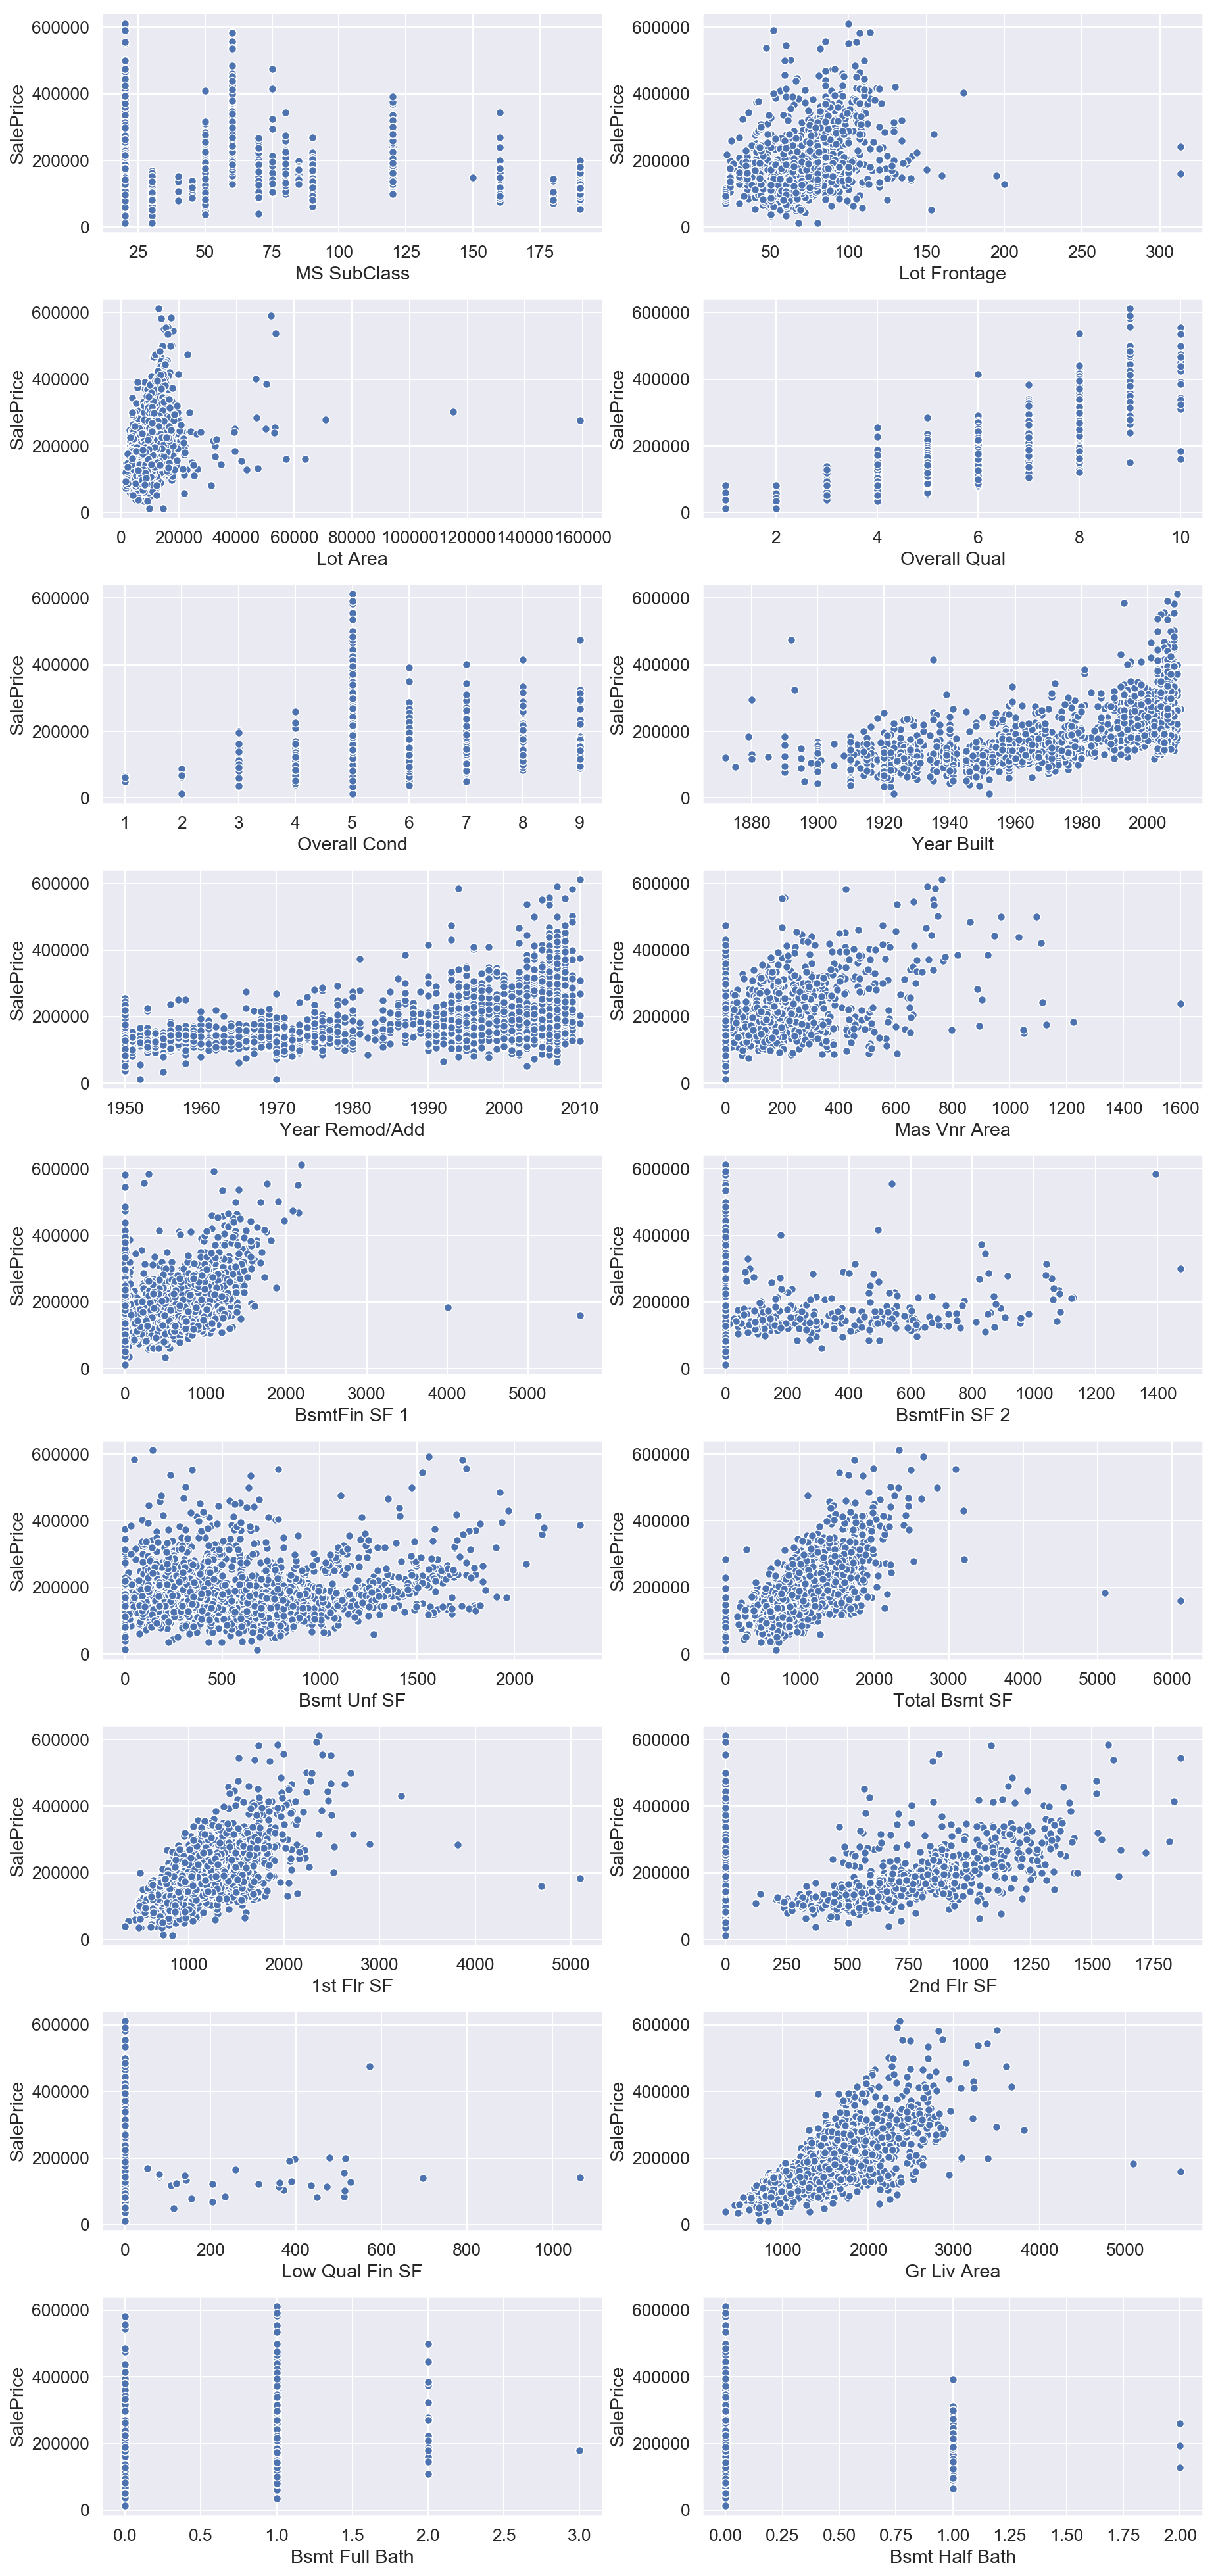

In [21]:
# plot first half of the list
plt.figure(figsize=(15, 35))
sns.set(font_scale=1.2)

for i, col in enumerate(numeric_cols[:18]):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.scatterplot(x=col, y='SalePrice', data=df);

1-2 outliers in the following columns are immediately noticeable since they go against the relationship depicted between the respective attributes and sales price:
* BsmtFin SF 1 (data points > 3000)
* 1st Flr SF (data points > 4000)
* Total Bsmt SF (data points > 4000)
* GR Liv Area (data points > 4000)

Let's check if all of these outliers belong to the same few houses, or if they are distributed between different points. If it's the former, we can remove it from the dataset.

In [22]:
df[(df['BsmtFin SF 1'] > 3000) & (df['Total Bsmt SF'] > 4000) & (df['Gr Liv Area'] > 4000) 
   & (df['1st Flr SF'] > 4000)]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235           60        RL       313.000     63887   Pave   
1885  2181  908154195           20        RL       128.000     39290   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
960    NaN       IR3          Bnk    AllPub     Corner        Gtl   
1885   NaN       IR1          Bnk    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
960        Stucco       Stucco        Stone       796.000         Ex   
1885      CemntBd      CmentBd        Stone      1224.000         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
960          TA      PConc        Ex        TA            Gd            GLQ   
1885         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960       5644.000            Unf         0.000      466.000       6110.000   
1885      4010.000            Unf         0.000     1085.000       5095.000   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
960     GasA         Ex           Y      SBrkr        4692         950   
1885    GasA         Ex           Y      SBrkr        5095           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
960                 0         5642           2.000           0.000          2   
1885                0         5095           1.000           1.000          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
960           1              3              1           Ex             12   
1885          1              2              1           Ex             15   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
960         Typ           3           Gd      Attchd       2008.000   
1885        Typ           2           Gd      Attchd       2008.000   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
960            Fin        2.000     1418.000          TA          TA   
1885           Fin        3.000     1154.000          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
960            Y           214            292               0           0   
1885           Y           546            484               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
960              0        480      Gd   NaN          NaN         0        1   
1885             0          0     NaN   NaN         Elev     17000       10   

      Yr Sold Sale Type  SalePrice  
960      2008       New     160000  
1885     2007       New     183850

As I expected, they belong to the same 2 houses which surprisingly had a very cheap price for their size. I'm going to remove these two points from the train dataset.

In [23]:
df.drop([960,1885], axis=0, inplace=True)

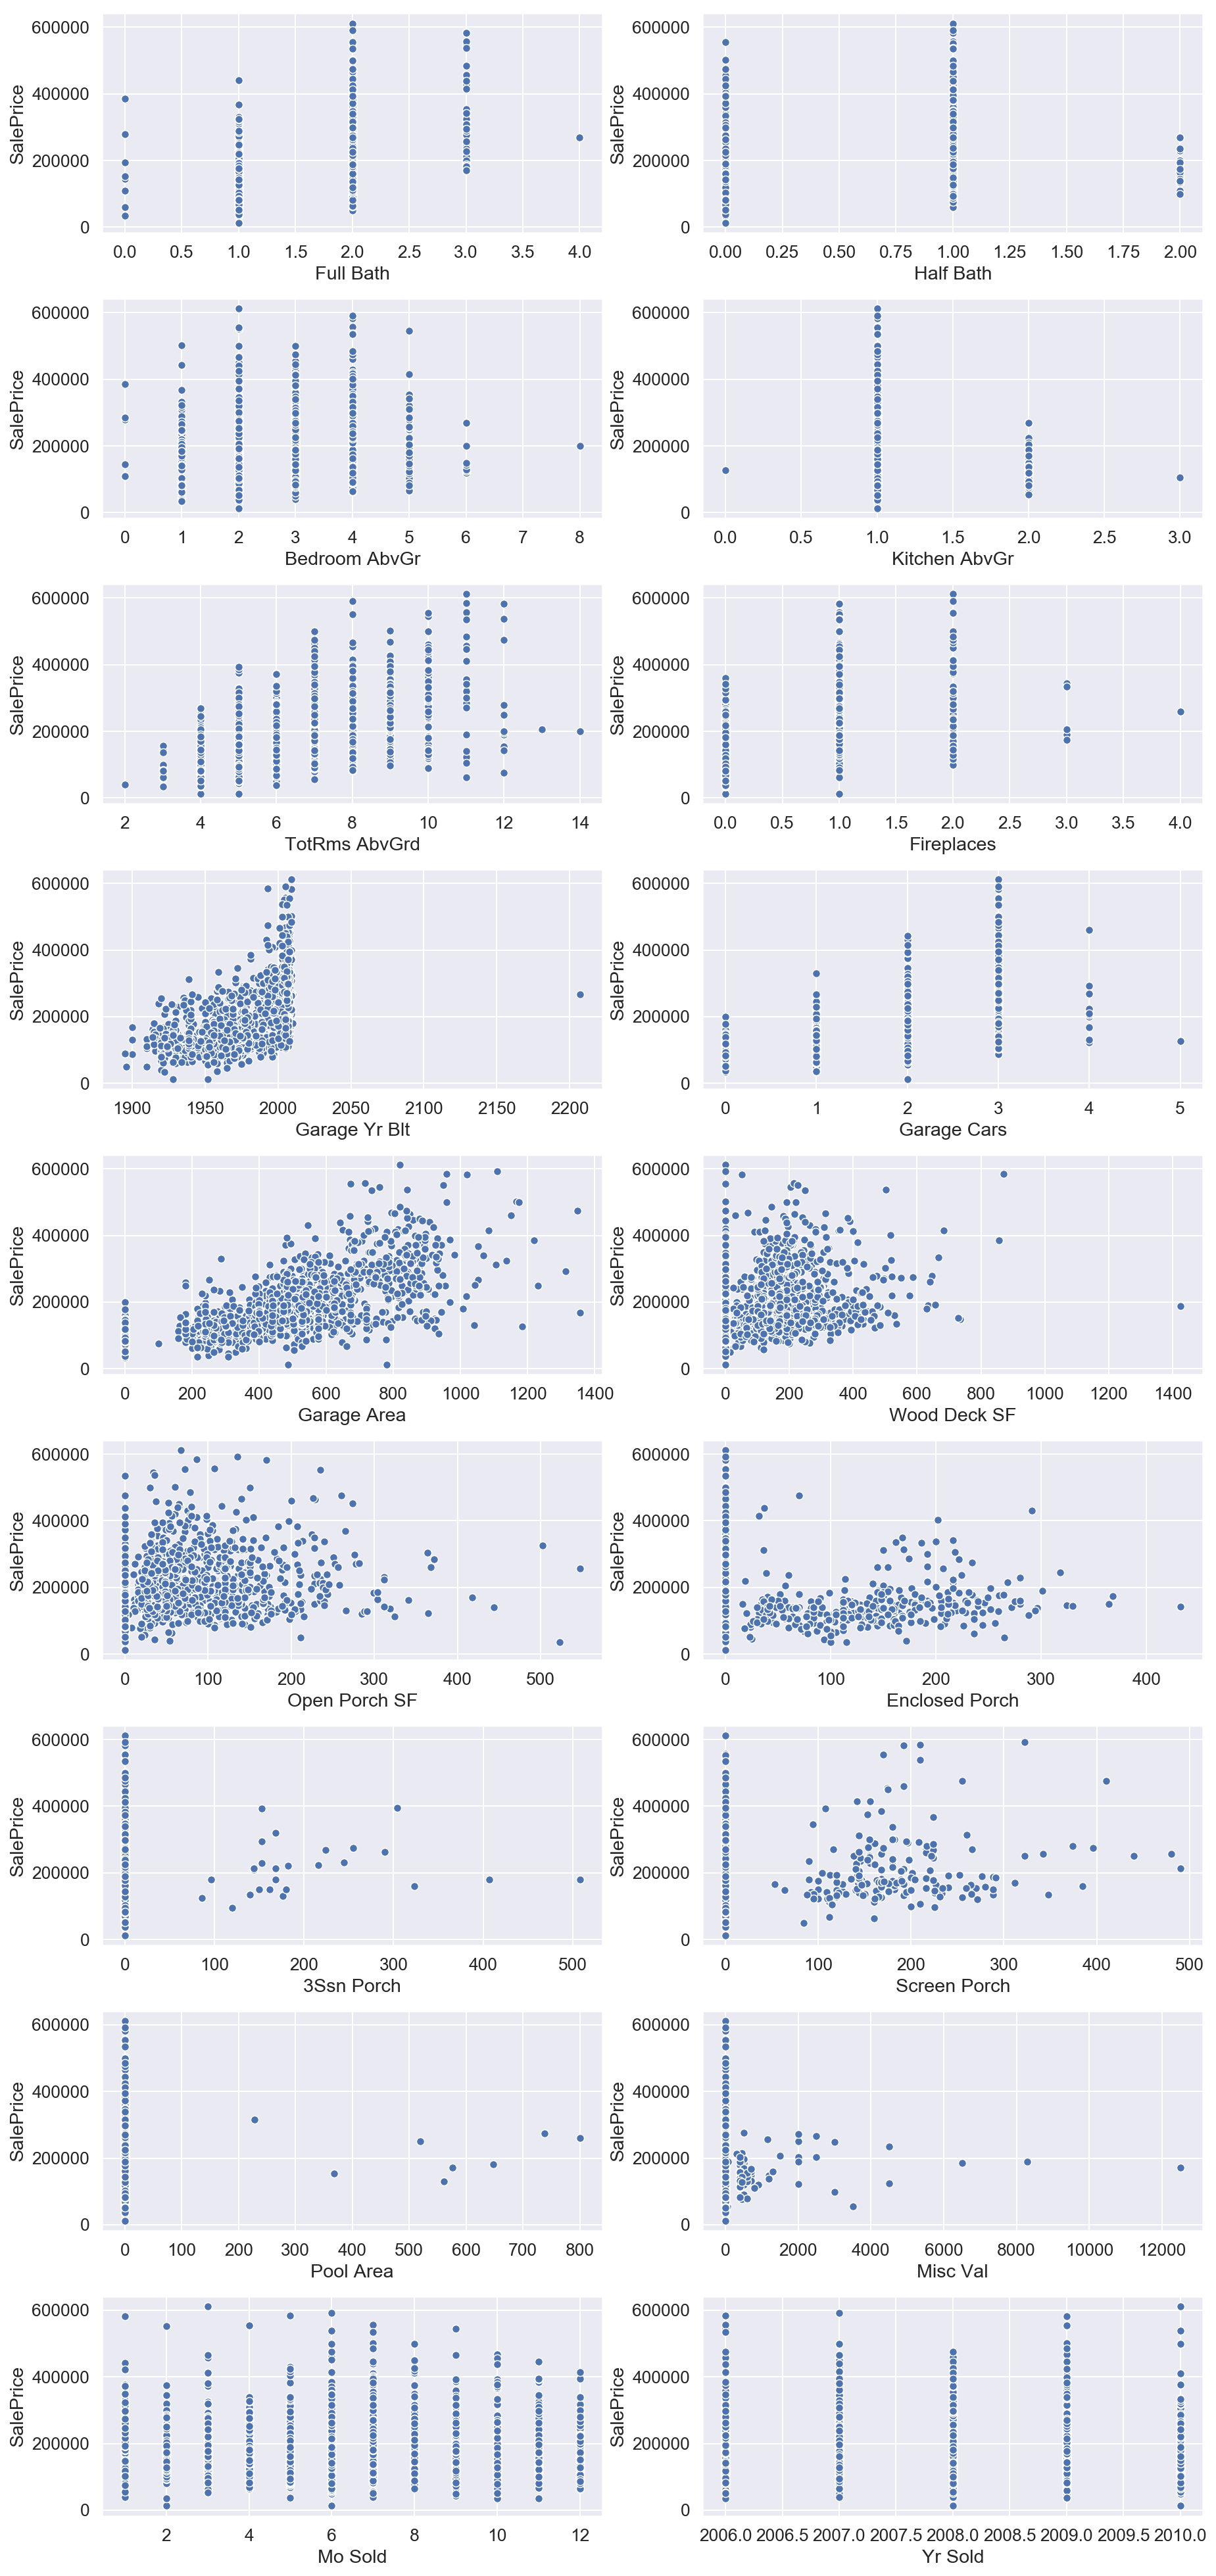

In [24]:
# plot latter half of the list
plt.figure(figsize=(15, 35))

for i, col in enumerate(numeric_cols[18:]):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.scatterplot(x=col, y='SalePrice', data=df);

* MS Subclass is a categorical column, should be converted to str.
* There is an error in the Garage Year Built column of a house, its after 2200. 
* Months are in numbers, should be converted to str.

In [25]:
df[df['Garage Yr Blt'] > 2200]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1699  2261  916384070           20        RL        68.000      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1699   NaN       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1699             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1699      VinylSd      VinylSd          NaN           nan         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1699       583.000            Unf         0.000      963.000       1546.000   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1699                0         1564           0.000           0.000          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1699          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1699        Typ           1           Gd      Attchd       2207.000   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1699           RFn        2.000      502.000          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1699           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1699             0          0     NaN   NaN          NaN         0        9   

      Yr Sold Sale Type  SalePrice  
1699     2007       New     267300

In [26]:
# set it equal to year built 
df.at[1699, 'Garage Yr Blt'] = 2006

Next, I'll check out the categorical columns in the dataset.

In [27]:
categorical_features = list(df.dtypes[df.dtypes == "object"].index)

# disregard the columns that i decided to remove for having too many nulls
for nulls in too_many_nulls:
    categorical_features.remove(nulls) 

In [28]:
df[categorical_features].head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   
2   CompShg      VinylSd      VinylSd         None         TA         Gd   
3   CompShg      VinylSd      VinylSd         None         TA         TA   
4   CompShg      Wd Sdng      Plywood         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   
2     CBlock        TA        TA            No            GLQ            Unf   
3      PConc        Gd        TA            No            Unf            Unf   
4      PConc        Fa        Gd            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Gd           Y      SBrkr           TA        Typ   
4    GasA         TA           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0          NaN      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2          NaN      Detchd           Unf          TA          TA           Y   
3          NaN     BuiltIn           Fin          TA          TA           Y   
4          NaN      Detchd           Unf          TA          TA           N   

  Sale Type  
0       WD   
1       WD   
2       WD   
3       WD   
4       WD

In [29]:
# do a quick visual inspection of the unique values in each column 
for feature in categorical_features:
    print(feature)
    print(pd.DataFrame({'value_counts': df[feature].value_counts()
                        , 'percentage': df[feature].value_counts()/df.shape[0] * 100}))
    print('\n')
    print('*' * 40)
    print('\n')

MS Zoning
         value_counts  percentage
RL               1596      77.892
RM                316      15.422
FV                101       4.929
C (all)            19       0.927
RH                 14       0.683
A (agr)             2       0.098
I (all)             1       0.049


****************************************


Street
      value_counts  percentage
Pave          2042      99.658
Grvl             7       0.342


****************************************


Lot Shape
     value_counts  percentage
Reg          1295      63.202
IR1           691      33.724
IR2            55       2.684
IR3             8       0.390


****************************************


Land Contour
     value_counts  percentage
Lvl          1843      89.946
HLS            85       4.148
Bnk            78       3.807
Low            43       2.099


****************************************


Utilities
        value_counts  percentage
AllPub          2047      99.902
NoSeWa             1       0.049
NoSewr

In some columns, almost all the values fall into the same category. These features won't serve as useful differentiators between different houses. I'm going to drop the ones in which more than 95% of the rows are the same value. 

In [30]:
same_category = ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating']

Let's create some boxplots to see how the remaining categorical columns are related to sale price.

In [31]:
categorical_features = [col for col in categorical_features if col not in same_category]

len(categorical_features)

32

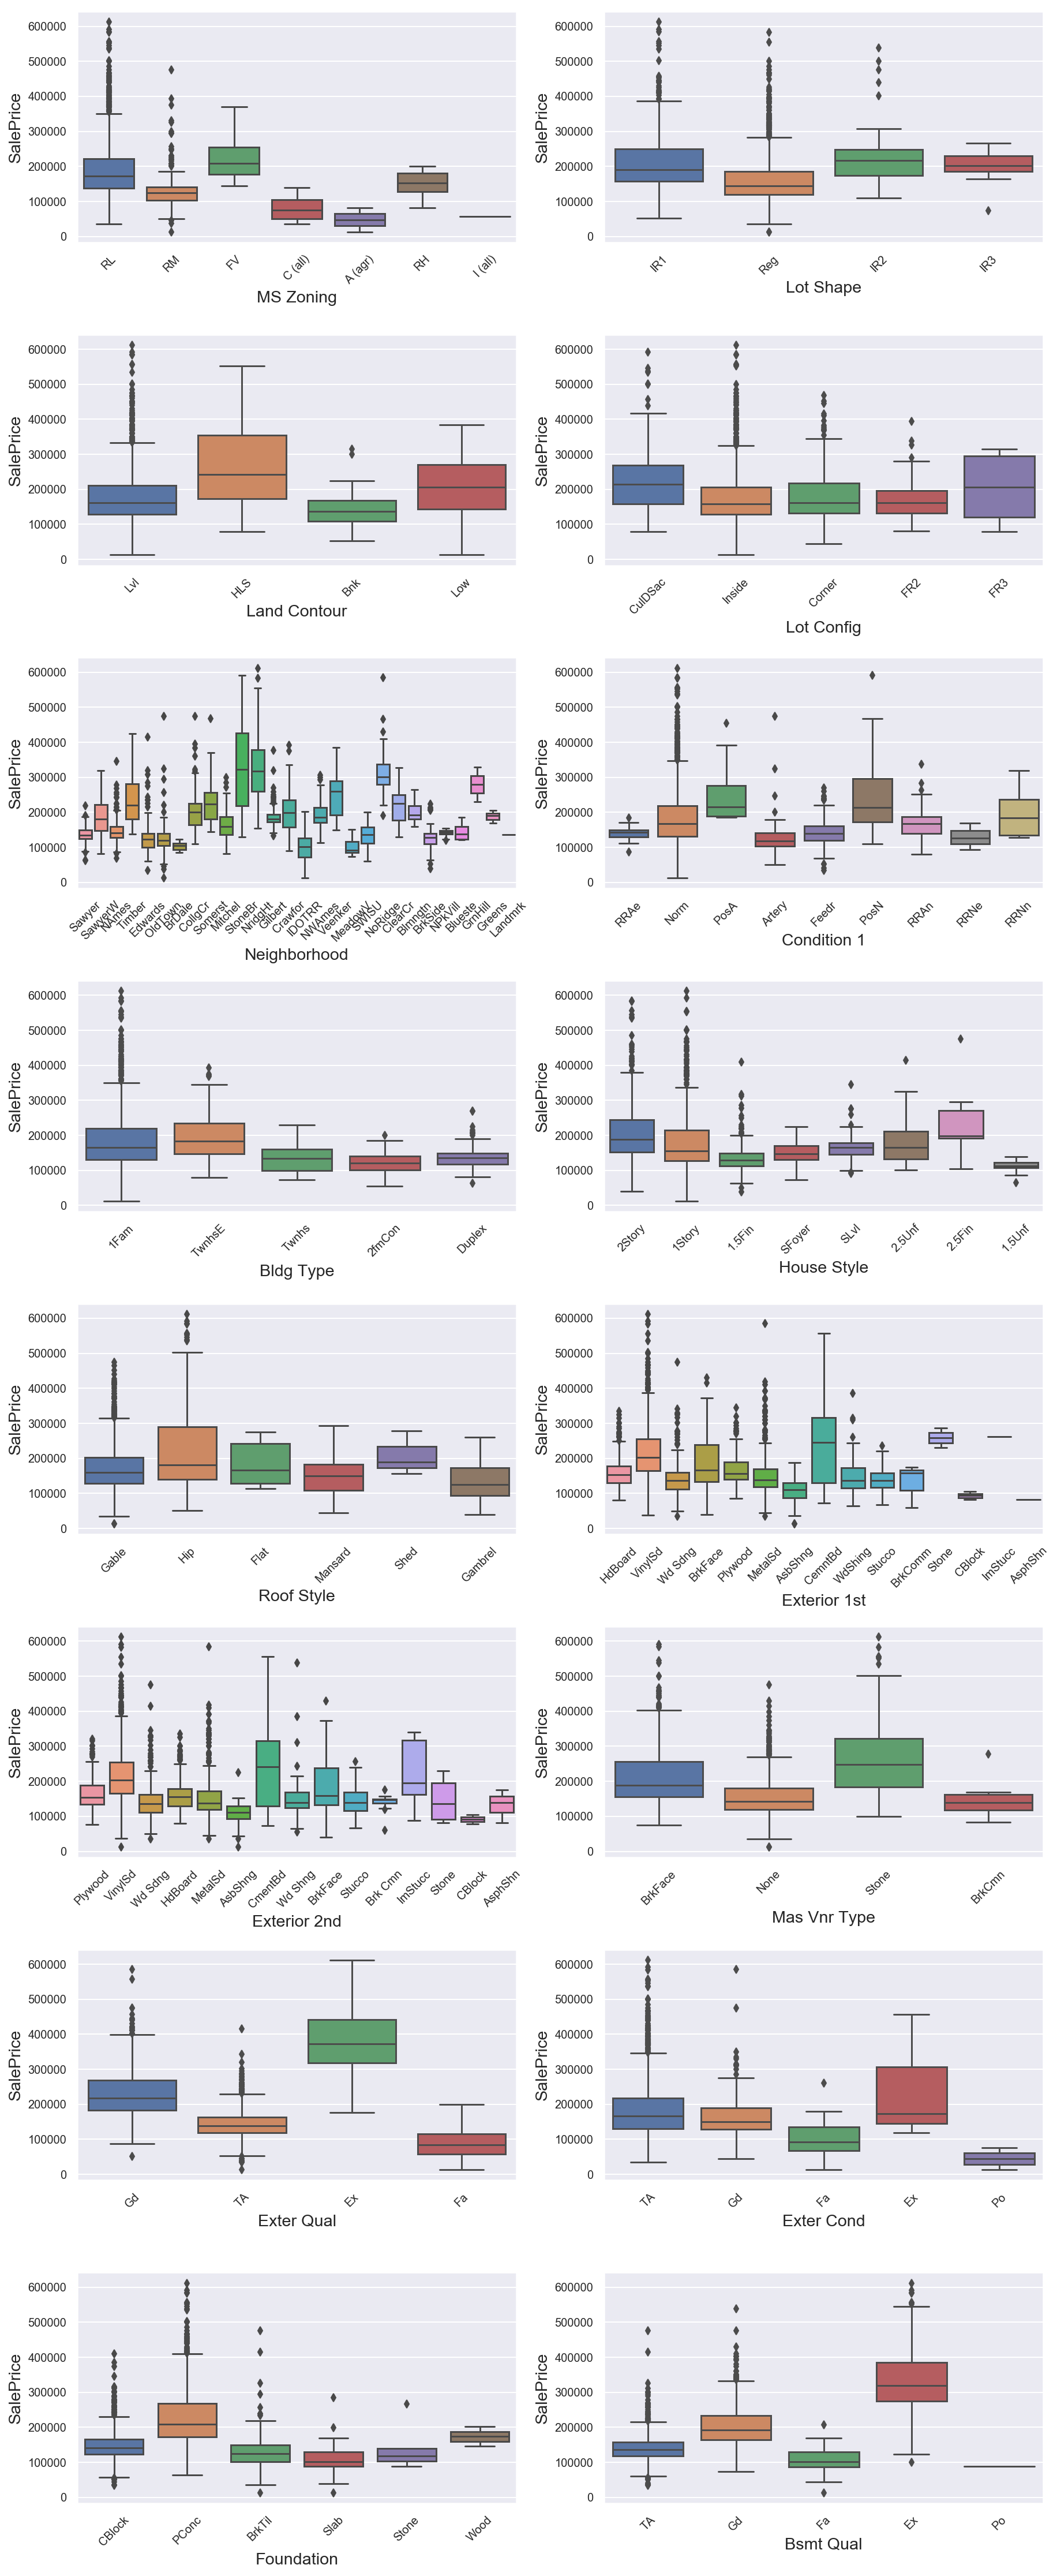

In [32]:
# plot first half of the list
plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_features[:16]):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.boxplot(df[col], df['SalePrice']);
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

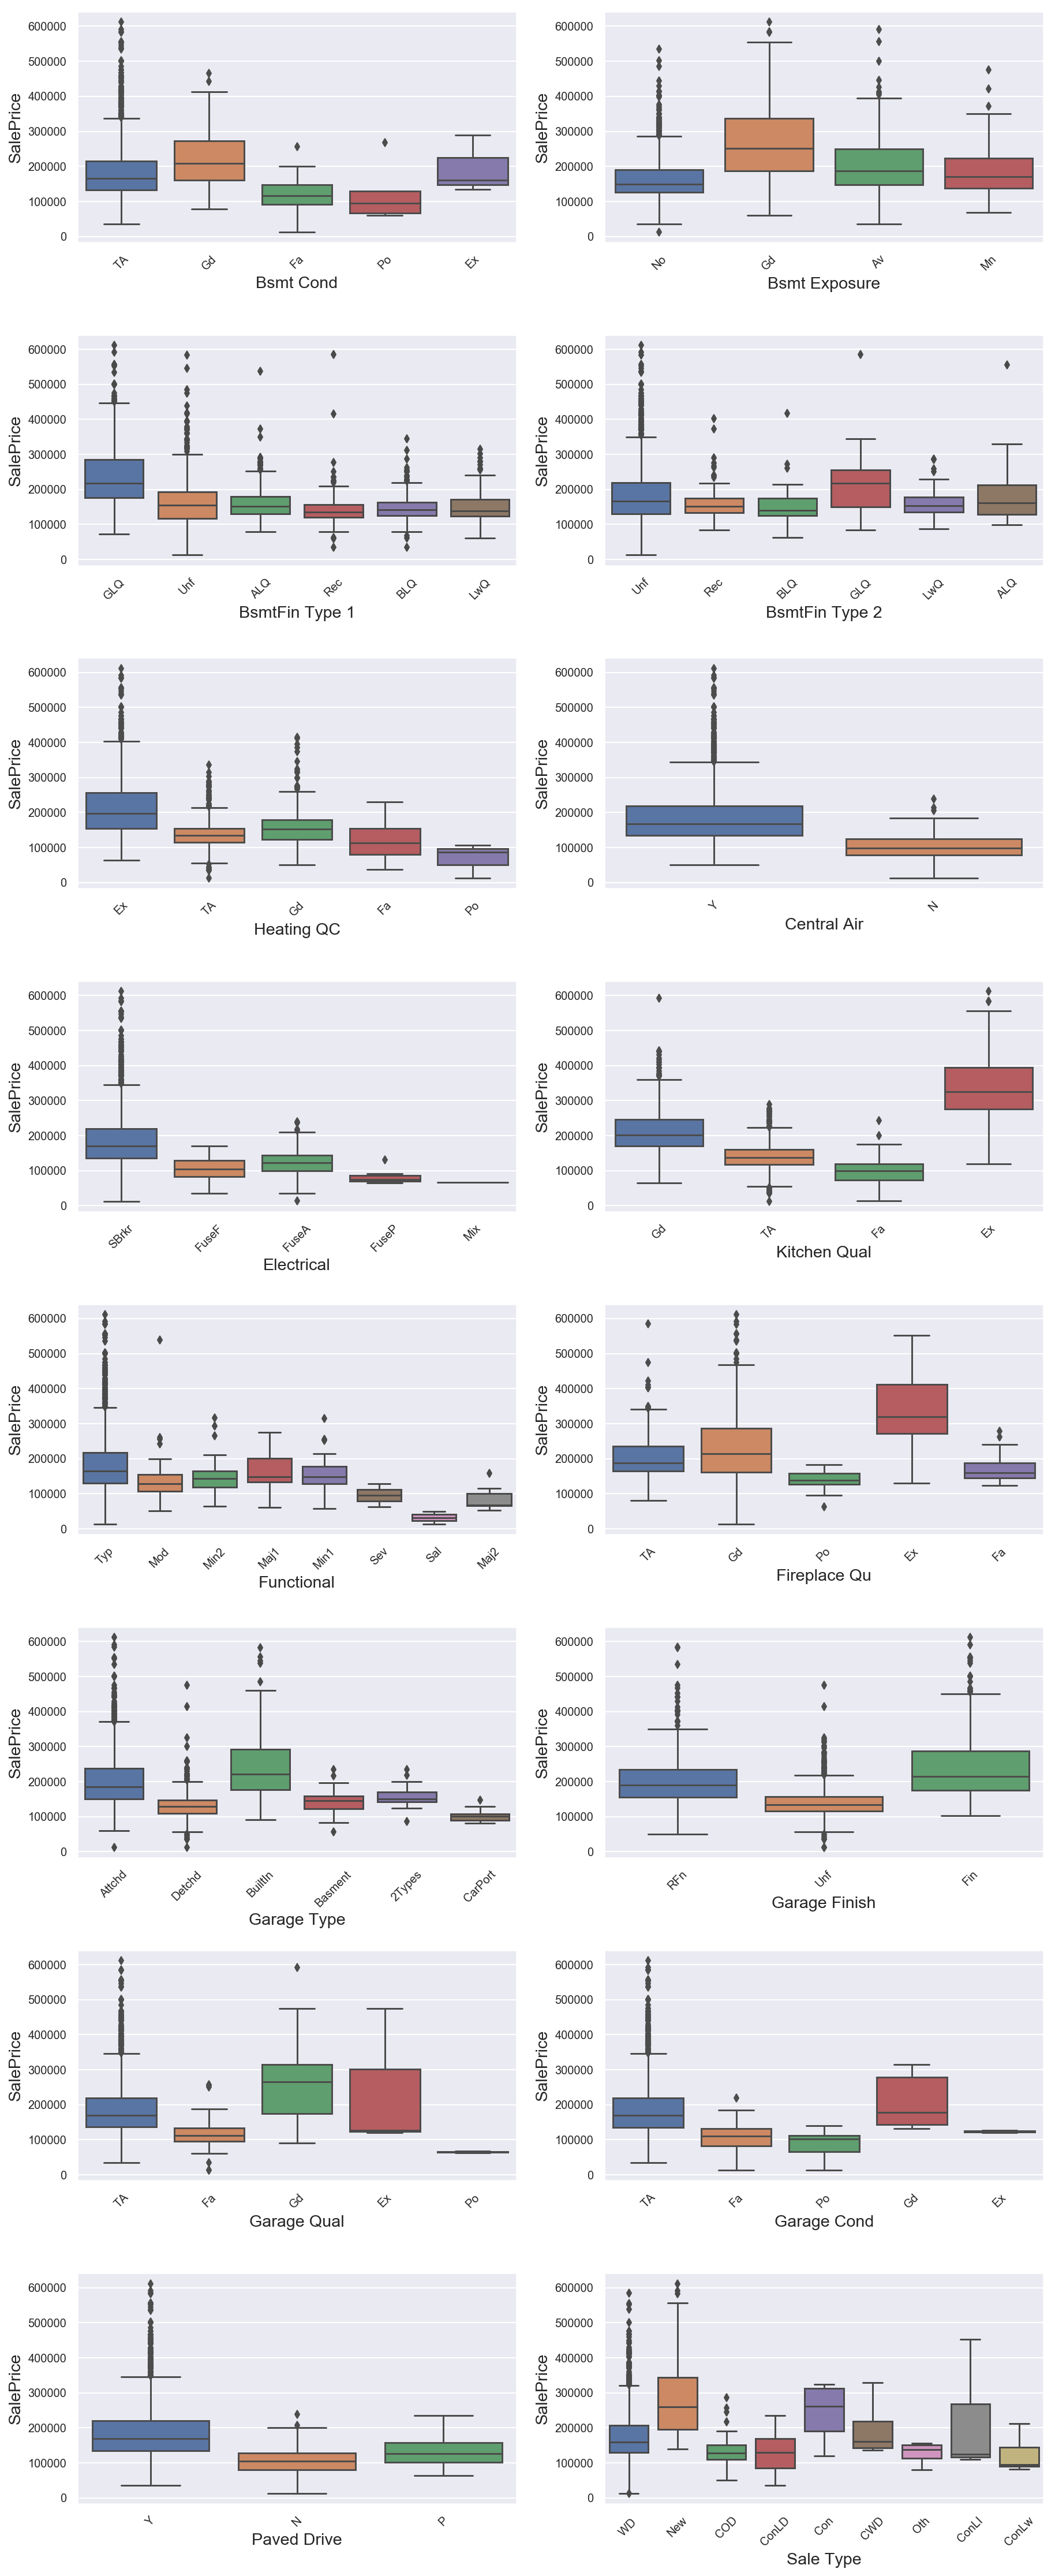

In [33]:
# plot latter half of the list
plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_features[16:]):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.boxplot(df[col], df['SalePrice']);
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

* Values in all the quality and condition columns can be encoded as numbers. 
* Values in Bsmt Exposure can be encoded as numbers.
* Central Air and Paved Drive are binary columns, can be encoded as 1s and 0s.

### 2. Data Cleaning

#### *1. Imputation of null values*

In [34]:
# columns with too many nulls
df.drop(columns=too_many_nulls, axis=1, inplace=True)

In [35]:
# fireplace doesn't exist, fill with None
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [36]:
# row 1712 - garage info is missing
# fill with mean or mode 
df.at[1712, 'Garage Yr Blt'] = int(df['Garage Yr Blt'].mean())
df.at[1702, 'Garage Finish'] = df['Garage Finish'].mode()[0]
df.at[1702, 'Garage Qual'] = df['Garage Qual'].mode()[0]
df.at[1702, 'Garage Cond'] = df['Garage Cond'].mode()[0]
df.at[1702, 'Garage Area'] = df['Garage Area'].mean()
df.at[1702, 'Garage Cars'] = int(df['Garage Cars'].mean())

# garage doesn't exist
# fill categorical garage columns with None
categorical_garage = df[garage_cols].dtypes[df[garage_cols].dtypes == 'object'].index
df[categorical_garage] = df[categorical_garage].fillna('None')

# fill numerical garage columns with 0
numerical_garage = df[garage_cols].dtypes[df[garage_cols].dtypes != 'object'].index
df[numerical_garage] = df[numerical_garage].fillna(0)

In [37]:
# lot frontage info is missing, fill with mean
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

In [38]:
# Bsmt Exposure at row 1456, 1547 and 1997 & the BsmtFin Type 2 at index 1147 are missing info
# fill with mode
df.at[1456, 'Bsmt Exposure'] = df['Bsmt Exposure'].mode()[0]
df.at[1547, 'Bsmt Exposure'] = df['Bsmt Exposure'].mode()[0]
df.at[1997, 'Bsmt Exposure'] = df['Bsmt Exposure'].mode()[0]
df.at[1147, 'BsmtFin Type 2'] = df['BsmtFin Type 2'].mode()[0]

# basement doesn't exist
# fill categorical basement columns with None
categorical_basement = df[basement_cols].dtypes[df[basement_cols].dtypes == 'object'].index
df[categorical_basement] = df[categorical_basement].fillna('None')

# fill categorical basement columns with 0
numerical_basement = df[basement_cols].dtypes[df[basement_cols].dtypes != 'object'].index
df[numerical_basement] = df[numerical_basement].fillna(0)

In [39]:
# masonry veneer doesn't exist, fill with 0 and None
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [40]:
# confirm that there are no nulls remaining
sum(df.isna().sum())

0

#### *2. Drop ID columns*

In [41]:
df.drop(columns=id_cols, axis=1, inplace=True)

#### *3. Drop same category columns*

In [42]:
df.drop(columns=same_category, axis=1, inplace=True)

#### *4. Encode ranked attributes as numbers*

Since the quality & condition columns have ranked values, we can change the string values with appropriate numeric values so we can directly pass them to a regression model. 

In [43]:
# get quality and condition columns
quality = [col for col in df.columns if col.endswith('Qual') or col.endswith('QC') or col.endswith('Qu')]
condition = [col for col in df.columns if col.endswith('Cond')]
merged = quality + condition
merged

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Qual',
 'Overall Cond',
 'Exter Cond',
 'Bsmt Cond',
 'Garage Cond']

In [44]:
df[merged].head()

Overall Qual Exter Qual Bsmt Qual Heating QC Kitchen Qual Fireplace Qu  \
0             6         Gd        TA         Ex           Gd         None   
1             7         Gd        Gd         Ex           Gd           TA   
2             5         TA        TA         TA           Gd         None   
3             5         TA        Gd         Gd           TA         None   
4             6         TA        Fa         TA           TA         None   

  Garage Qual  Overall Cond Exter Cond Bsmt Cond Garage Cond  
0          TA             8         TA        TA          TA  
1          TA             5         TA        TA          TA  
2          TA             7         Gd        TA          TA  
3          TA             5         TA        TA          TA  
4          TA             8         TA        Gd          TA

Overall quality and condition columns are in good format, but the rest need to be changed.

In [45]:
merged.remove('Overall Qual')
merged.remove('Overall Cond')
# Ex: Excellent
# Gd: Good
# TA: Typical
# Fa: Fair
# Po: Poor
# None: Doesn't exist
df[merged] = df[merged].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

#### *5. Fix Bsmt Exposure*

In [46]:
df['Bsmt Exposure'].value_counts()

No      1342
Av       288
Gd       201
Mn       163
None      55
Name: Bsmt Exposure, dtype: int64

No is same as None, we need to standardize the value for it across the board. We can follow a similar conversion strategy as above. 

In [47]:
# Gd: Good
# Av: Average
# Mn: Minimum
# No, None: Doesn't exist
df['Bsmt Exposure'] = df['Bsmt Exposure'].replace({'No': 0, 
                                                   'None': 0, 
                                                   'Gd': 3, 
                                                   'Av': 2, 
                                                   'Mn': 1})

#### *6. Encode binary columns as numbers*

Central Air and Paved Drive columns have Yes/No values which we can encode as 1s and 0s.

In [48]:
df['Central Air'] = np.where(df['Central Air'] == 'Y', 1, 0)
df['Paved Drive'] = np.where(df['Paved Drive'] == 'Y', 1, 0)

#### *7. Fix MSSubClass*

This column is actually a categorical column describing the building class type of the homes, so i need to convert it to an object. 

In [49]:
df['MS SubClass'] = df['MS SubClass'].astype(str) + '_MSC'

#### *8. Convert months in Mo Sold to categories*

In [50]:
dict = {}
# get abbv of every month 
for month_idx in range(1, 13):
    dict[month_idx] = calendar.month_abbr[month_idx]

df['Mo Sold'] = df['Mo Sold'].replace(dict)

#### *9. Tidy up column names*

In [51]:
df.columns = df.columns.str.lower()

In [52]:
df.columns = df.columns.str.replace(' ', '_')

In [53]:
# save cleaned data to csv
df.to_csv('datasets/cleaned_train_data.csv', index=False)

### 3. Naive model

I'm going to create a stupid model with one variable which I'm going to try to beat. This will be the baseline against which I'll compare my model. I'll do a simple linear regression with general living area as the only feature.

In [59]:
model = LinearRegression()
X = df[['gr_liv_area']]
y = df[['saleprice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

/Users/dunyaoguz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [60]:
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=5).mean()

0.5140709092349927

In [61]:
# lets see how it performs on test data
model.score(X_test, y_test)

0.49247523369026625

Hopefully I'll figure out a way to get a better $r^{2}$ than that!